In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('ecommerce_furniture_dataset_2024.csv')

In [3]:
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [4]:
df.isnull().sum()

productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64

In [5]:
df.shape

(2000, 5)

In [6]:
df.drop(['originalPrice'], axis=1,inplace=True)

In [7]:
df

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$21.37,1,Free shipping
...,...,...,...,...
1995,Modern TV Stand Entertainment Center with Two ...,$72.49,8,Free shipping
1996,"Large Wardrobe Armoire Closet with 3 Doors, Fr...",$276.65,2,Free shipping
1997,"Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...",$196.44,10,Free shipping
1998,Furniture Acrylic Coffee Table Transparent Liv...,$228.18,0,Free shipping


In [8]:
df['tagText'].nunique()

100

In [9]:
df['tagText'].value_counts()

tagText
Free shipping           1880
+Shipping: $5.09           9
+Shipping: $239.64         2
+Shipping: $97.54          2
+Shipping: $64.56          2
                        ... 
+Shipping: $88.26          1
+Shipping: $170.31         1
+Shipping: $1,097.18       1
+Shipping: $106.13         1
+Shipping: $171.49         1
Name: count, Length: 100, dtype: int64

In [10]:
df['tagText'] = df['tagText'].apply(lambda x: x if x in ['Free shipping', '+Shipping: $5.09']
                                    else 'others')

print(df['tagText'].value_counts())

tagText
Free shipping       1880
others               111
+Shipping: $5.09       9
Name: count, dtype: int64


In [11]:
import seaborn as sns

<Axes: xlabel='tagText', ylabel='count'>

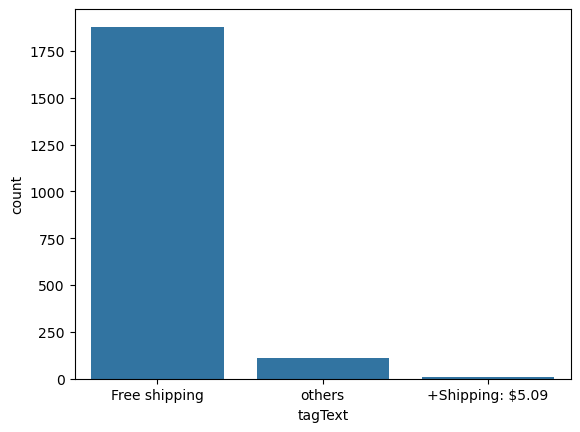

In [12]:
sns.countplot(x= 'tagText', data=df)

In [13]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Asus\AppData\Local\Temp\ipykernel_6768\2337335738.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


In [14]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,Free shipping


<Axes: xlabel='price', ylabel='Count'>

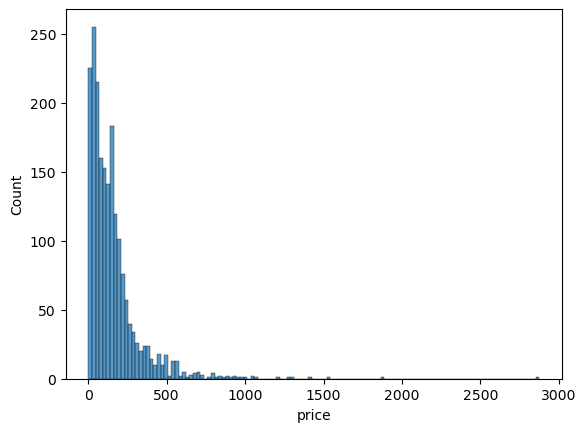

In [15]:
sns.histplot(df['price'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_6768\2507294489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sold'])


<Axes: xlabel='sold', ylabel='Density'>

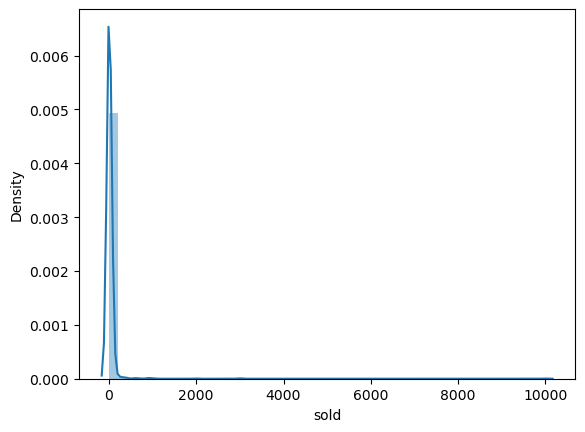

In [16]:
sns.distplot(df['sold'])

<Axes: xlabel='price', ylabel='sold'>

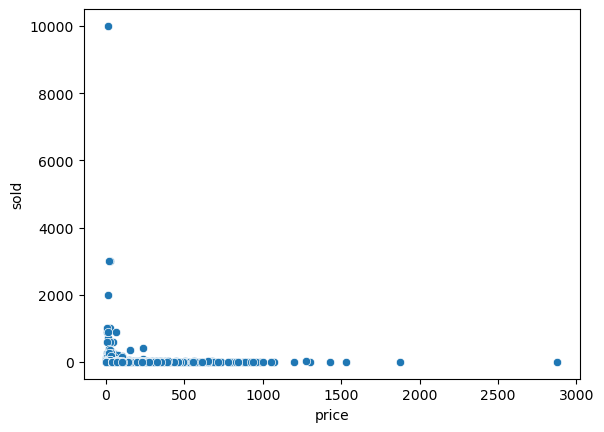

In [17]:
sns.scatterplot(x='price', y='sold', data=df)

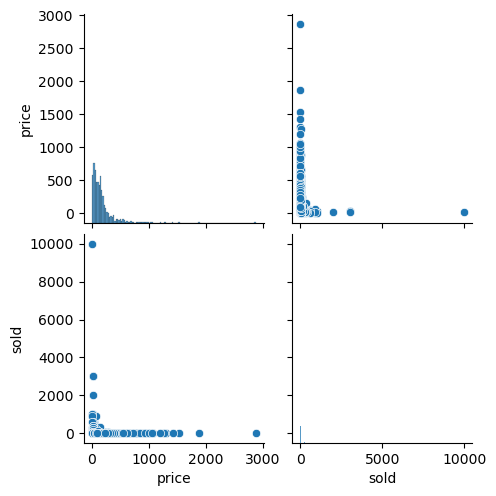

In [18]:
filtered_df = df[df['tagText'] == 'Free shipping']


sns.pairplot(filtered_df[['price', 'sold']])

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df['tagText']=le.fit_transform(df['tagText'])

In [21]:
df.head()

,productTitle,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,600,1
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,0,1
2,Desser For Bedroom With 7 Fabric Drawers Organ...,39.46,7,1
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,0,1
4,Small Unit Simple Computer Desk Household Wood...,21.37,1,1


In [22]:
df['tagText'].value_counts()

tagText
1    1880
2     111
0       9
Name: count, dtype: int64